<a href="https://colab.research.google.com/github/AshHydroCoder/GRACE-Downscaler/blob/Branch1/Processing_GRACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#!pip install netCDF4
!#pip install rioxarray
from netCDF4 import Dataset, num2date, date2num
import pandas as pd
import rioxarray
import geopandas as gpd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import xarray as xr
file = '/content/drive/MyDrive/Thesis/RAW/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-corrections.nc'
GRACE = xr.open_dataset(file)
GRACE

<xarray.Dataset> Size: 987MB
Dimensions:        (time: 238, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) float32 952B 107.0 129.5 227.5 ... 8.294e+03 8.324e+03
  * lon            (lon) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat            (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 2kB ...
    lwe_thickness  (time, lat, lon) float32 987MB ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0603M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2025-01-06T11:43:54Z
    variable:                   liquid water equivalent thickness
    label:                      RL0603rc24cE
    Mask:                       Global

In [19]:
# Access the time variable
time_var = GRACE.variables['time']  # Replace 'time' with the actual variable name if different

# Get the original time values, units, and calendar
time_values = time_var[:]
time_units = time_var.encoding.get('units', 'days since 2002-01-01')
time_calendar = getattr(time_var, 'calendar', 'gregorian')

# Convert to standard datetime format
standard_dates = num2date(time_values, units=time_units, calendar=time_calendar)
standard_dates = [pd.Timestamp(d.strftime()) for d in standard_dates]

# Replace the time variable values with ISO format strings
new_time_units = "ISO standard time format"
new_time_values = [str(date) for date in standard_dates]

# Update the time variable
# Assuming time variable is 1D and compatible
new_time = date2num(
    standard_dates, units=f"days since {standard_dates[0]}", calendar="gregorian"
)


In [20]:
new_time

array([   0. ,   22.5,  120.5,  151. ,  181.5,  212. ,  242.5,  273.5,
        303. ,  332.5,  363. ,  388.5,  454.5,  485.5,  516. ,  546.5,
        577. ,  607.5,  629.5,  670. ,  698.5,  729. ,  759.5,  790. ,
        820.5,  851.5,  882. ,  912.5,  943. ,  973.5, 1004.5, 1034. ,
       1063.5, 1094. , 1124.5, 1155. , 1185.5, 1216.5, 1247. , 1277.5,
       1308. , 1338.5, 1369.5, 1399. , 1428.5, 1459. , 1489.5, 1520. ,
       1550.5, 1581.5, 1612. , 1642.5, 1673. , 1703.5, 1734.5, 1763.5,
       1793.5, 1824. , 1854.5, 1885. , 1915.5, 1946.5, 1977. , 2007.5,
       2038. , 2068.5, 2099.5, 2129.5, 2159.5, 2190. , 2220.5, 2251. ,
       2281.5, 2312.5, 2343. , 2373.5, 2404. , 2434.5, 2465.5, 2495. ,
       2524.5, 2555. , 2585.5, 2616. , 2646.5, 2677.5, 2708. , 2738.5,
       2769. , 2799.5, 2830.5, 2860. , 2889.5, 2920. , 2950.5, 2981. ,
       3011.5, 3042.5, 3073. , 3103.5, 3134. , 3162.5, 3228.5, 3254.5,
       3285. , 3315.5, 3378.5, 3407.5, 3438. , 3468.5, 3483.5, 3541. ,
      

In [27]:
import xarray as xr
file = '/content/drive/MyDrive/Thesis/RAW/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-corrections.nc'
GRACE = xr.open_dataset(file)
# Access the time variable
time_var = GRACE.variables['time']  # Replace 'time' with the actual variable name if different

# Get the original time values, units, and calendar
time_values = time_var[:]
time_units = time_var.encoding.get('units', 'days since 2002-01-01')
time_calendar = getattr(time_var, 'calendar', 'gregorian')

# Convert to standard datetime format
standard_dates = num2date(time_values, units=time_units, calendar=time_calendar)
standard_dates = [pd.Timestamp(d.strftime()) for d in standard_dates]

# Create a new DataArray with the modified time values and units
from netCDF4 import date2num
import numpy as np
# Update the time variable
# Assuming time variable is 1D and compatible
new_time_values = date2num(
    standard_dates, units=f"days since {standard_dates[0]}", calendar="gregorian"
)
#new_time_var = xr.DataArray(new_time_values, dims='time', coords={'time': standard_dates})
new_time_var = xr.DataArray(standard_dates, dims='time', coords={'time': standard_dates})

# Update the Dataset with the new time variable using assign_coords
GRACE = GRACE.assign_coords(time=new_time_var)
GRACE = GRACE.assign_coords(time=pd.DatetimeIndex(GRACE['time'].values))
GRACE

<xarray.Dataset> Size: 987MB
Dimensions:        (time: 238, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * lon            (lon) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat            (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * time           (time) datetime64[ns] 2kB 2002-04-18 ... 2024-10-16T12:00:00
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 2kB ...
    lwe_thickness  (time, lat, lon) float32 987MB ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0603M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2025-01-06T11:43:54Z
    variable:                   liquid water equivalent thickness
    label:                      RL0603rc24cE
    Mask:                       Global

In [34]:
#GRACE = GRACE.drop_vars('time_bounds')
output = '/content/drive/MyDrive/Thesis/RAW/GRACE_Aquifer.nc'
shapefile_path = '/content/drive/MyDrive/Thesis/AQUIFER/South of Outer Himalaya Aquifer.shp'
shapefile = gpd.read_file(shapefile_path)
GRACE.rio.write_crs('epsg:4326', inplace=True)
clipped_data = GRACE.rio.clip(shapefile.geometry, drop = False)
clipped_data

<xarray.Dataset> Size: 987MB
Dimensions:        (lon: 1440, lat: 720, time: 238)
Coordinates:
  * lon            (lon) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat            (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * time           (time) datetime64[ns] 2kB 2002-04-18 ... 2024-10-16T12:00:00
    WGS84          int64 8B 0
Data variables:
    lwe_thickness  (time, lat, lon) float32 987MB nan nan nan ... nan nan nan
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0603_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0603M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2025-01-06T11:43:54Z
    variable:                   liquid water equivalent thickness
    label:                      RL0603rc24cE
    Mask:                       Global

In [36]:
clipped_data.to_netcdf(output)
print(f"Clipped dataset saved to: {output}")

Clipped dataset saved to: /content/drive/MyDrive/Thesis/RAW/GRACE_Aquifer.nc


<ipython-input-46-b67de03bcd4c>:30: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  lat_idx = np.abs(lat_var[:] - target_lat).argmin()
<ipython-input-46-b67de03bcd4c>:30: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  lat_idx = np.abs(lat_var[:] - target_lat).argmin()
<ipython-input-46-b67de03bcd4c>:31: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  lon_idx = np.abs(lon_var[:] - target_lon).argmin()
<ipython-input-46-b67de03bcd4c>:31: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  lon_idx = np.abs(lon_var[:] - target_lon).argmin()


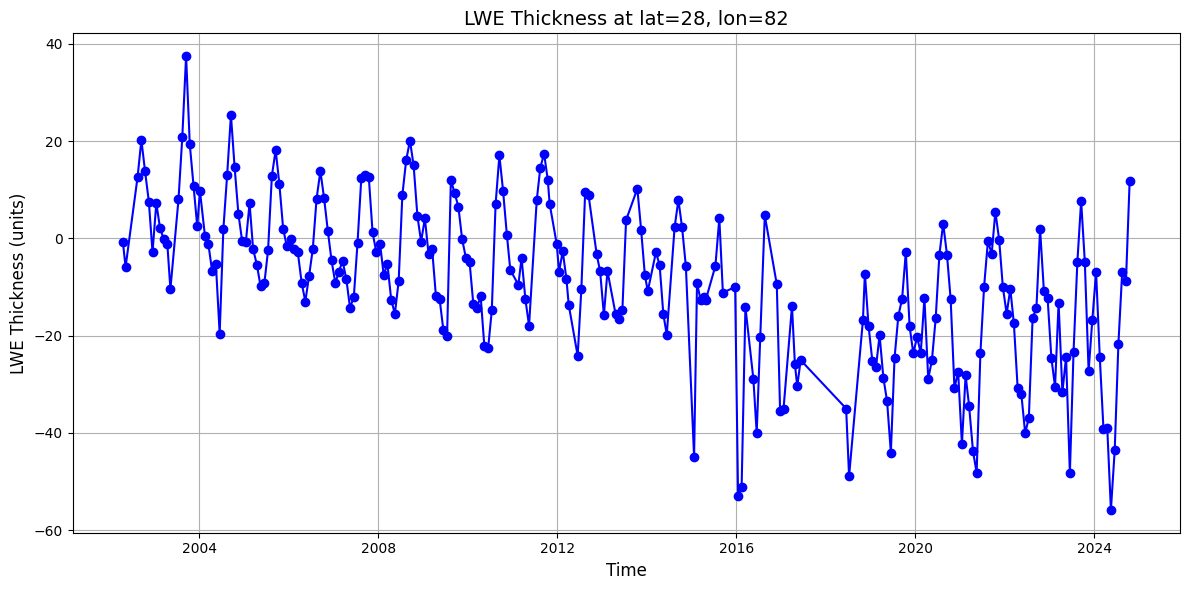

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from datetime import datetime
import cftime

# Define the file path and the specific location (latitude and longitude)
file_path = '/content/drive/MyDrive/Thesis/RAW/GRACE_Aquifer.nc'  # Replace with your file path
target_lat = 28  # Replace with your target latitude
target_lon = 82  # Replace with your target longitude

# Open the NetCDF file
nc_file = Dataset(file_path, mode='r')

# Read variables
time_var = nc_file.variables['time']
lat_var = nc_file.variables['lat']
lon_var = nc_file.variables['lon']
lwe_thickness = nc_file.variables['lwe_thickness']

# Convert time values to standard datetime objects
time_units = time_var.units
time_calendar = getattr(time_var, 'calendar', 'gregorian')
time_values = time_var[:]
time_dates_cftime = num2date(time_values, units=time_units, calendar=time_calendar)

time_dates = [d.datetime if hasattr(d, 'datetime') else datetime(d.year, d.month, d.day) for d in time_dates_cftime]

# Find the nearest latitude and longitude indices
lat_idx = np.abs(lat_var[:] - target_lat).argmin()
lon_idx = np.abs(lon_var[:] - target_lon).argmin()

# Extract data for the specific location
lwe_thickness_location = lwe_thickness[:, lat_idx, lon_idx]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time_dates, lwe_thickness_location, marker='o', linestyle='-', color='b')
plt.title(f'LWE Thickness at lat={target_lat}, lon={target_lon}', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('LWE Thickness (units)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Close the NetCDF file
nc_file.close()
